# Let's build first neural network, which will have one hidden layer and check the difference with logistic regression


In [18]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model


%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from planar_utils import load_planar_dataset, plot_decision_boundary
X, Y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

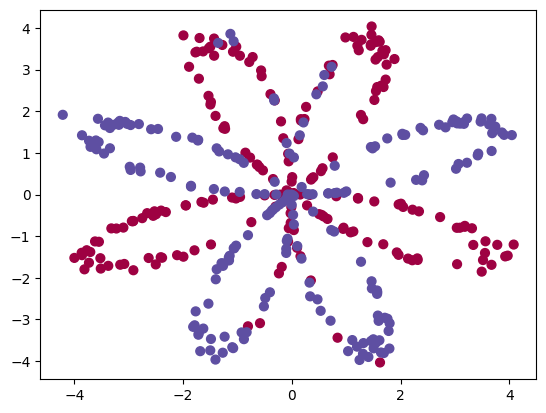

In [20]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

### Visualize shape of the variables X and Y

In [21]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

# YOUR CODE ENDS HERE

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [22]:
# Let's check how logistic regression solve this problem before building a neural network

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/home/awalehdek/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


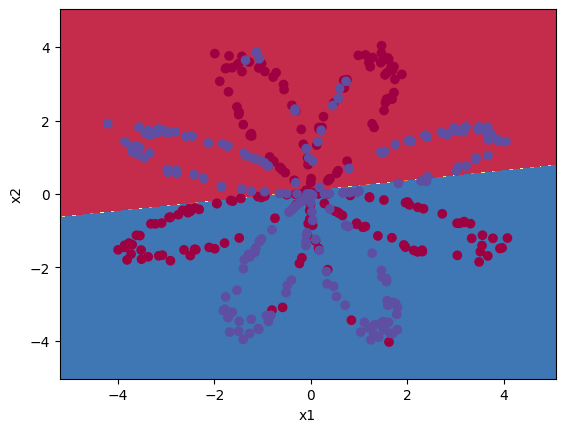

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


/tmp/ipykernel_19878/4242423965.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


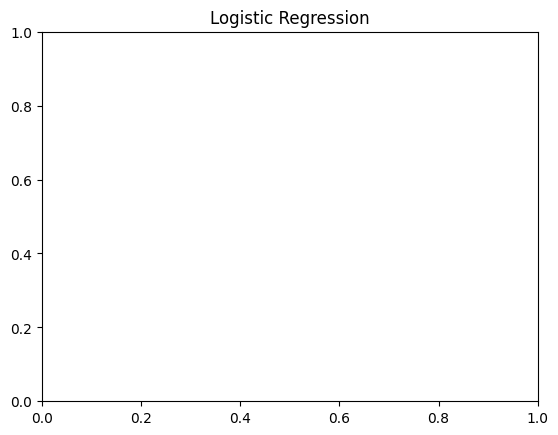

In [23]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [24]:
# Interpretation: The dataset is not linearly separable, so logistic regression doesn't perform well.


<a name='4'></a>
## 4 - Neural Network model

Logistic regression didn't work well on the flower dataset. Next, you're going to train a Neural Network with a single hidden layer and see how that handles the same problem.

**The model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

In practice, you'll often build helper functions to compute steps 1-3, then merge them into one function called `nn_model()`. Once you've built `nn_model()` and learned the right parameters, you can make predictions on new data.

Define three variables:

n_x: the size of the input layer
n_h: the size of the hidden layer (set this to 4, as n_h = 4, but only for this Exercise 2)
n_y: the size of the output layer

In [25]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    
    return (n_x, n_h, n_y)



def layer_sizes_test_case():
    """
    Generates a test case for the layer_sizes function.

    Returns:
    t_X -- a dummy input dataset of shape (5, 10) (e.g., 5 features and 10 examples)
    t_Y -- a dummy output label set of shape (1, 10) (e.g., 1 output per example for binary classification)
    """
    t_X = np.random.randn(5, 10)  # 5 input features, 10 examples
    t_Y = np.random.randint(0, 2, (1, 10))  # 1 output feature, 10 examples (binary labels)
    return t_X, t_Y

def layer_sizes_test(layer_sizes_func):
    """
    Tests the layer_sizes function to verify correct output sizes.

    Arguments:
    layer_sizes_func -- function to test (in this case, layer_sizes)
    
    Prints:
    Test results showing whether the output matches expected values.
    """
    t_X, t_Y = layer_sizes_test_case()
    n_x, n_h, n_y = layer_sizes_func(t_X, t_Y)

    assert n_x == 5, f"Expected n_x = 5, but got {n_x}"
    assert n_h == 4, f"Expected n_h = 4, but got {n_h}"
    assert n_y == 1, f"Expected n_y = 1, but got {n_y}"

    print("layer_sizes test passed!")

In [26]:
t_X, t_Y = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(t_X, t_Y)

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))


The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


Implement the function initialize_parameters().

Instructions:

Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
You will initialize the weights matrices with random values.
Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b).
You will initialize the bias vectors as zeros.
Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [27]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    

    W1 = np.random.randn(n_h,n_x)* 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))
    
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def initialize_parameters_test_case():
    """
    Generates a test case with specific input, hidden, and output layer sizes.
    
    Returns:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    """
    np.random.seed(1)  # For reproducible results
    n_x = 3  # Example input layer size
    n_h = 4  # Example hidden layer size
    n_y = 1  # Example output layer size
    return n_x, n_h, n_y

def initialize_parameters_test(initialize_parameters_func):
    """
    Tests the initialize_parameters function to verify the initialization of weights and biases.
    
    Arguments:
    initialize_parameters_func -- function to test ( initialize_parameters)
    
    Prints:
    Test results to confirm whether the output matches expected shapes and values.
    """
    n_x, n_h, n_y = initialize_parameters_test_case()
    parameters = initialize_parameters_func(n_x, n_h, n_y)
    
    # Check shapes of each parameter
    assert parameters["W1"].shape == (n_h, n_x), f"Expected W1 shape {(n_h, n_x)}, but got {parameters['W1'].shape}"
    assert parameters["b1"].shape == (n_h, 1), f"Expected b1 shape {(n_h, 1)}, but got {parameters['b1'].shape}"
    assert parameters["W2"].shape == (n_y, n_h), f"Expected W2 shape {(n_y, n_h)}, but got {parameters['W2'].shape}"
    assert parameters["b2"].shape == (n_y, 1), f"Expected b2 shape {(n_y, 1)}, but got {parameters['b2'].shape}"
    
    print("initialize_parameters test passed!")

In [28]:
# Testing 
np.random.seed(2)
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_test(initialize_parameters)

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207  0.00319039]
 [-0.0024937   0.01462108 -0.02060141]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00322417 -0.00384054  0.01133769 -0.01099891]]
b2 = [[0.]]
initialize_parameters test passed!


<a name='4-3'></a>
### 4.3 - The Loop 

<a name='ex-4'></a>
### Exercise 4 - forward_propagation

Implement `forward_propagation()` using the following equations:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$


**Instructions**:

- Check the mathematical representation of your classifier in the figure above.
- Use the function `sigmoid()`. It's built into (imported) this notebook.
- Use the function `np.tanh()`. It's part of the numpy library.
- Implement using these steps:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()` by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [29]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
   
         # hidden layer
    Z1 = np.dot(W1,X) +b1
        # tanh
    A1 = np.tanh(Z1)
        # output layer
    Z2 = np.dot(W2,A1) +b2
        # sigmoid
    A2 = 1/(1+np.exp(-Z2))
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


def forward_propagation_test_case():
    
    np.random.seed(1)
    t_X = np.random.randn(3, 2)  # (3 features, 2 examples)
    
    parameters = {
        "W1": np.random.randn(4, 3),  # Hidden layer weights of shape (4, 3)
        "b1": np.random.randn(4, 1),  # Hidden layer biases of shape (4, 1)
        "W2": np.random.randn(1, 4),  # Output layer weights of shape (1, 4)
        "b2": np.random.randn(1, 1)   # Output layer bias of shape (1, 1)
    }
    return t_X, parameters

def forward_propagation_test(forward_propagation):
    
    t_X, parameters = forward_propagation_test_case()
    A2, cache = forward_propagation(t_X, parameters)
    

    # Expected values from running this case
    #expected_A2 = np.array([[0.7447, 0.7730]])  # Sample output for validation
    expected_A2 = np.array([[0.6228, 0.1341]])
    np.testing.assert_array_almost_equal(A2, expected_A2, decimal=4)
    
    print("forward_propagation test passed!")


In [30]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))

forward_propagation_test(forward_propagation)

A2 = [[0.6228025  0.13408705]]
forward_propagation test passed!


<a name='4-4'></a>
### 4.4 - Compute the Cost

Computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$
 `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  
- You can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). 
- You can also cast the array as a type `float` using `float()`.

<a name='ex-5'></a>
###  computing cost function 

Implement `compute_cost()` to compute the value of the cost $J$.
This is one way to implement one part of the equation without for loops:
$- \sum\limits_{i=1}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)          
```

In [ ]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost.
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing parameters W1, b1, W2, and b2 (not used here but kept for consistency)
    
    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]  # number of examples
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))  # Ensures cost is a scalar
    
    assert(isinstance(cost, float))
    
    return cost


In [ ]:
def compute_cost_test_case():
    np.random.seed(1)
    A2 = np.random.rand(1, 5)  # Example predicted probabilities
    Y = np.array([[1, 0, 1, 0, 1]])  # Example true labels
    parameters = {}  # Parameters are not used in this function
    return A2, Y, parameters


- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.